In [1]:
# caricare dataset

import pandas as pd

data_path = "../data/data_aggregate.csv"
df = pd.read_csv(data_path)
df.head()

/var/folders/z4/vv8gb7j93tn006mx_gs44wdm0000gp/T/ipykernel_34080/1648670239.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_pm25,AQ_co,AQ_nh3,AQ_nox,...,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use
0,1264,46.167852,9.87921,2016-01-01,290,43.857143,39.000000,NaN,NaN,81.427143,...,4.5745,0.839629,12.043,2.7474,0.3832,5.885143,3.996857,1.233571,112,17.0
1,1264,46.167852,9.87921,2016-01-08,290,33.200000,28.800000,NaN,NaN,97.348571,...,5.1026,0.848257,12.075,2.7923,0.3832,5.844000,3.995143,1.231571,112,17.0
2,1264,46.167852,9.87921,2016-01-15,290,31.000000,24.285714,NaN,NaN,70.772857,...,5.6231,0.856871,12.117,2.8387,0.3832,5.844000,3.994571,1.230857,112,17.0
3,1264,46.167852,9.87921,2016-01-22,290,48.714286,40.142857,NaN,NaN,114.104286,...,6.2937,0.865600,12.097,2.8551,0.3832,5.796000,3.995571,1.232286,112,17.0
4,1264,46.167852,9.87921,2016-01-29,290,45.142857,37.714286,NaN,NaN,90.008571,...,7.2585,0.874629,11.949,2.8076,0.3832,5.796000,3.996429,1.233571,112,17.0


In [2]:
# raggruppo per anni e cerco anno con più valori

df['Time'] = pd.to_datetime(df['Time'])

years = df['Time'].dt.year.unique()
years

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int32)

In [3]:
# creo dataset per ogni anno

dataset_years = {year: df[df['Time'].dt.year == year].reset_index(drop=True) for year in years}

# salvo dataset in un csv per ogni anno

for year, df_year in dataset_years.items():
    name_file = f'dataset_{year}.csv'
    df_year.to_csv(name_file, index=False)

In [4]:
# controllo valori nulli per ogni anno di ogni variabile

file_list = ['dataset_2016.csv', 'dataset_2017.csv', 'dataset_2018.csv', 'dataset_2019.csv', 'dataset_2020.csv', 'dataset_2021.csv']
df_null_values = {}

for file in file_list:
  df = pd.read_csv(file)
  null_values = df.isnull().sum()
  df_null_values[file] = null_values

print(df_null_values)

# il numero di valori nulli è simile per ogni anno --> non scelgo in base a questo

{'dataset_2016.csv': IDStations                        0
Latitude                          0
Longitude                         0
Time                              0
Altitude                          0
AQ_pm10                        1959
AQ_pm25                        4879
AQ_co                          4645
AQ_nh3                         7097
AQ_nox                         2835
AQ_no2                          626
AQ_so2                         5460
WE_temp_2m                        0
WE_wind_speed_10m_mean            0
WE_wind_speed_10m_max             0
WE_mode_wind_direction_10m        0
WE_tot_precipitation              0
WE_precipitation_t                0
WE_surface_pressure               0
WE_solar_radiation                0
WE_rh_min                         0
WE_rh_mean                        0
WE_rh_max                         0
WE_wind_speed_100m_mean           0
WE_wind_speed_100m_max            0
WE_mode_wind_direction_100m       0
WE_blh_layer_max                  0
WE_blh_

In [5]:
import numpy as np

# faccio media per anno di ppm25 e altri valori

file_list = ['dataset_2016.csv', 'dataset_2017.csv', 'dataset_2018.csv', 'dataset_2019.csv', 'dataset_2020.csv', 'dataset_2021.csv']
df_mean_ppm25 = {}

for file in file_list:
  df = pd.read_csv(file)
  mean_ppm25 = np.mean(df['AQ_pm25'])
  df_mean_ppm25[file] = mean_ppm25

print(df_mean_ppm25)

{'dataset_2016.csv': 21.102149899034405, 'dataset_2017.csv': 23.699064545771993, 'dataset_2018.csv': 19.857245161991738, 'dataset_2019.csv': 18.71310818900047, 'dataset_2020.csv': 19.30466592959801, 'dataset_2021.csv': 18.417764985111834}


In [6]:
# 2016 e 2017 sono più alti degli altri, prendiamo 2017/2018/2020 e vediamo le diverse timeseries dei dati di una stazione

df = pd.read_csv('dataset_2017.csv')

df['AQ_pm25'] = pd.to_numeric(df['AQ_pm25'], errors='coerce')

groups_stations = df.groupby('IDStations')

stations_wo_nan_pm25 = []

# Itera attraverso i gruppi di stazioni
for station, data_station in groups_stations:
    # Verifica se la stazione ha valori non nulli per PM2.5 in ogni misurazione
    if not data_station['AQ_pm25'].isnull().any():
        stations_wo_nan_pm25.append(station)

# Stampare le stazioni senza valori nulli di PM2.5 per ogni misurazione
print("Stazioni senza valori nulli di PM2.5 per ogni misurazione:")
print(stations_wo_nan_pm25)

# 1264 (Sondrio), 1265 (Lodi), 1297 (Cremona-molto inquinato), STA.IT0499A (Bolzano), 548 (Milano), CH-0033A (Svizzera) --> più rappresentative

Stazioni senza valori nulli di PM2.5 per ogni misurazione:
['1264', '1265', '1269', '1297', '504', '548', '554', '560', '561', '576', '583', '592', '600', '627', '633', '642', '649', '669', '674', '681', '685', '693', '695', '697', '703', '705', '706', 'STA-CH0033A', 'STA.IT0499A', 'STA.IT0804A', 'STA.IT0940A', 'STA.IT1518A', 'STA.IT1532A', 'STA.IT1771A', 'STA.IT1830A', 'STA.IT1878A', 'STA.IT1904A', 'STA.IT1914A', 'STA.IT1918A', 'STA.IT1924A', 'STA.IT1975A']


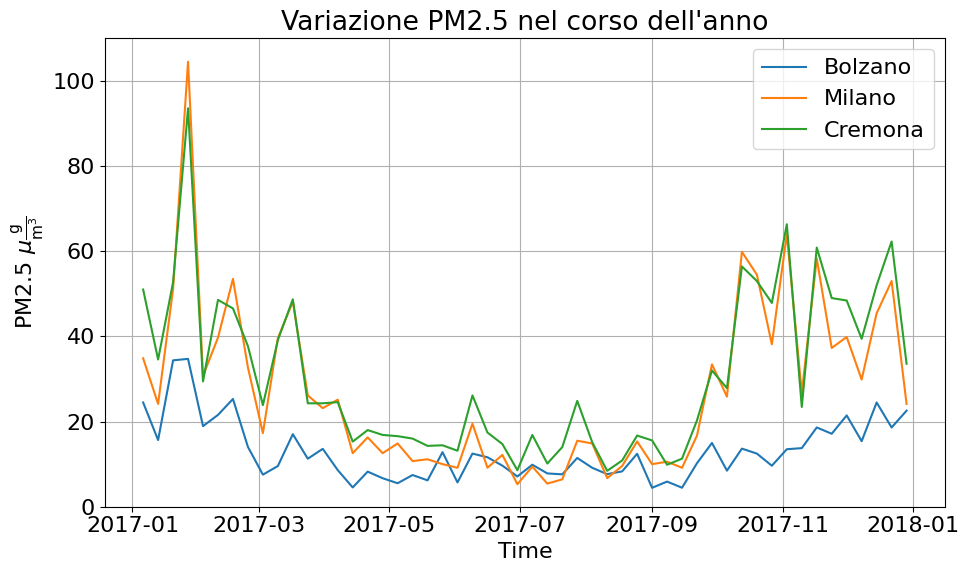

In [7]:
# Bolzano-Milano-Cremona nel 2017

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({"font.size": 16})

df = pd.read_csv("dataset_2017.csv")

# Assicurati che la colonna 'PM2.5' sia in formato numerico e 'Data' sia in formato datetime
df["AQ_pm25"] = pd.to_numeric(df["AQ_pm25"], errors="coerce")
df["Time"] = pd.to_datetime(df["Time"])

# Seleziona tre stazioni
stations_sel = ["STA.IT0499A", "548", "1297"]
labels = ["Bolzano", "Milano", "Cremona"]

# Filtra il dataset per le stazioni selezionate
df_sel = df[df["IDStations"].isin(stations_sel)]

# Crea un subplot per il grafico
plt.figure(figsize=(10, 6))

# Itera attraverso le stazioni selezionate e plotta i dati PM2.5 nel corso dell'anno
for station, label in zip(stations_sel, labels):
    df_station = df_sel[df_sel["IDStations"] == station]
    plt.plot(df_station["Time"], df_station["AQ_pm25"], label=label)

# Impostazioni del grafico
plt.title("Variazione PM2.5 nel corso dell'anno")
plt.xlabel("Time")
plt.ylabel(r"PM2.5 $\mu \frac{\mathrm{g}}{\mathrm{m}^3}$")
plt.ylim(0, 110)
plt.legend()
plt.grid(True)

# Visualizza il grafico
plt.tight_layout()
plt.show()

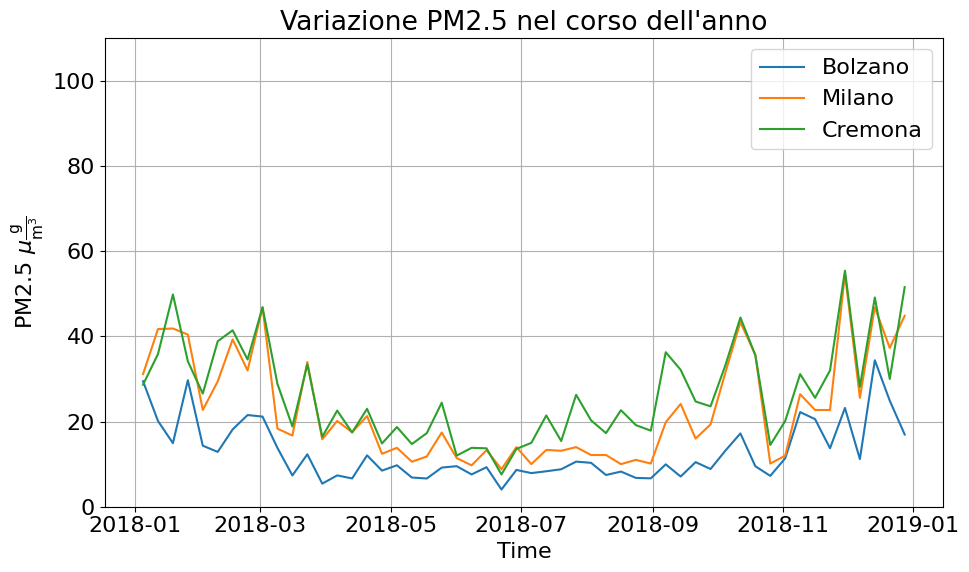

In [8]:
# Bolzano-Milano-Cremona nel 2018

import matplotlib.pyplot as plt

df = pd.read_csv('dataset_2018.csv')

# Assicurati che la colonna 'PM2.5' sia in formato numerico e 'Data' sia in formato datetime
df['AQ_pm25'] = pd.to_numeric(df['AQ_pm25'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'])

# Seleziona tre stazioni
stations_sel = ['STA.IT0499A', '548', '1297']
labels = ['Bolzano','Milano','Cremona']

# Filtra il dataset per le stazioni selezionate
df_sel = df[df['IDStations'].isin(stations_sel)]

# Crea un subplot per il grafico
plt.figure(figsize=(10, 6))

# Itera attraverso le stazioni selezionate e plotta i dati PM2.5 nel corso dell'anno
for station, label in zip(stations_sel, labels):
    df_station = df_sel[df_sel['IDStations'] == station]
    plt.plot(df_station['Time'], df_station['AQ_pm25'], label=label)

# Impostazioni del grafico
plt.title('Variazione PM2.5 nel corso dell\'anno')
plt.xlabel('Time')
plt.ylabel(r"PM2.5 $\mu \frac{\mathrm{g}}{\mathrm{m}^3}$")
plt.ylim(0,110)
plt.legend()
plt.grid(True)

# Visualizza il grafico
plt.tight_layout()
plt.show()

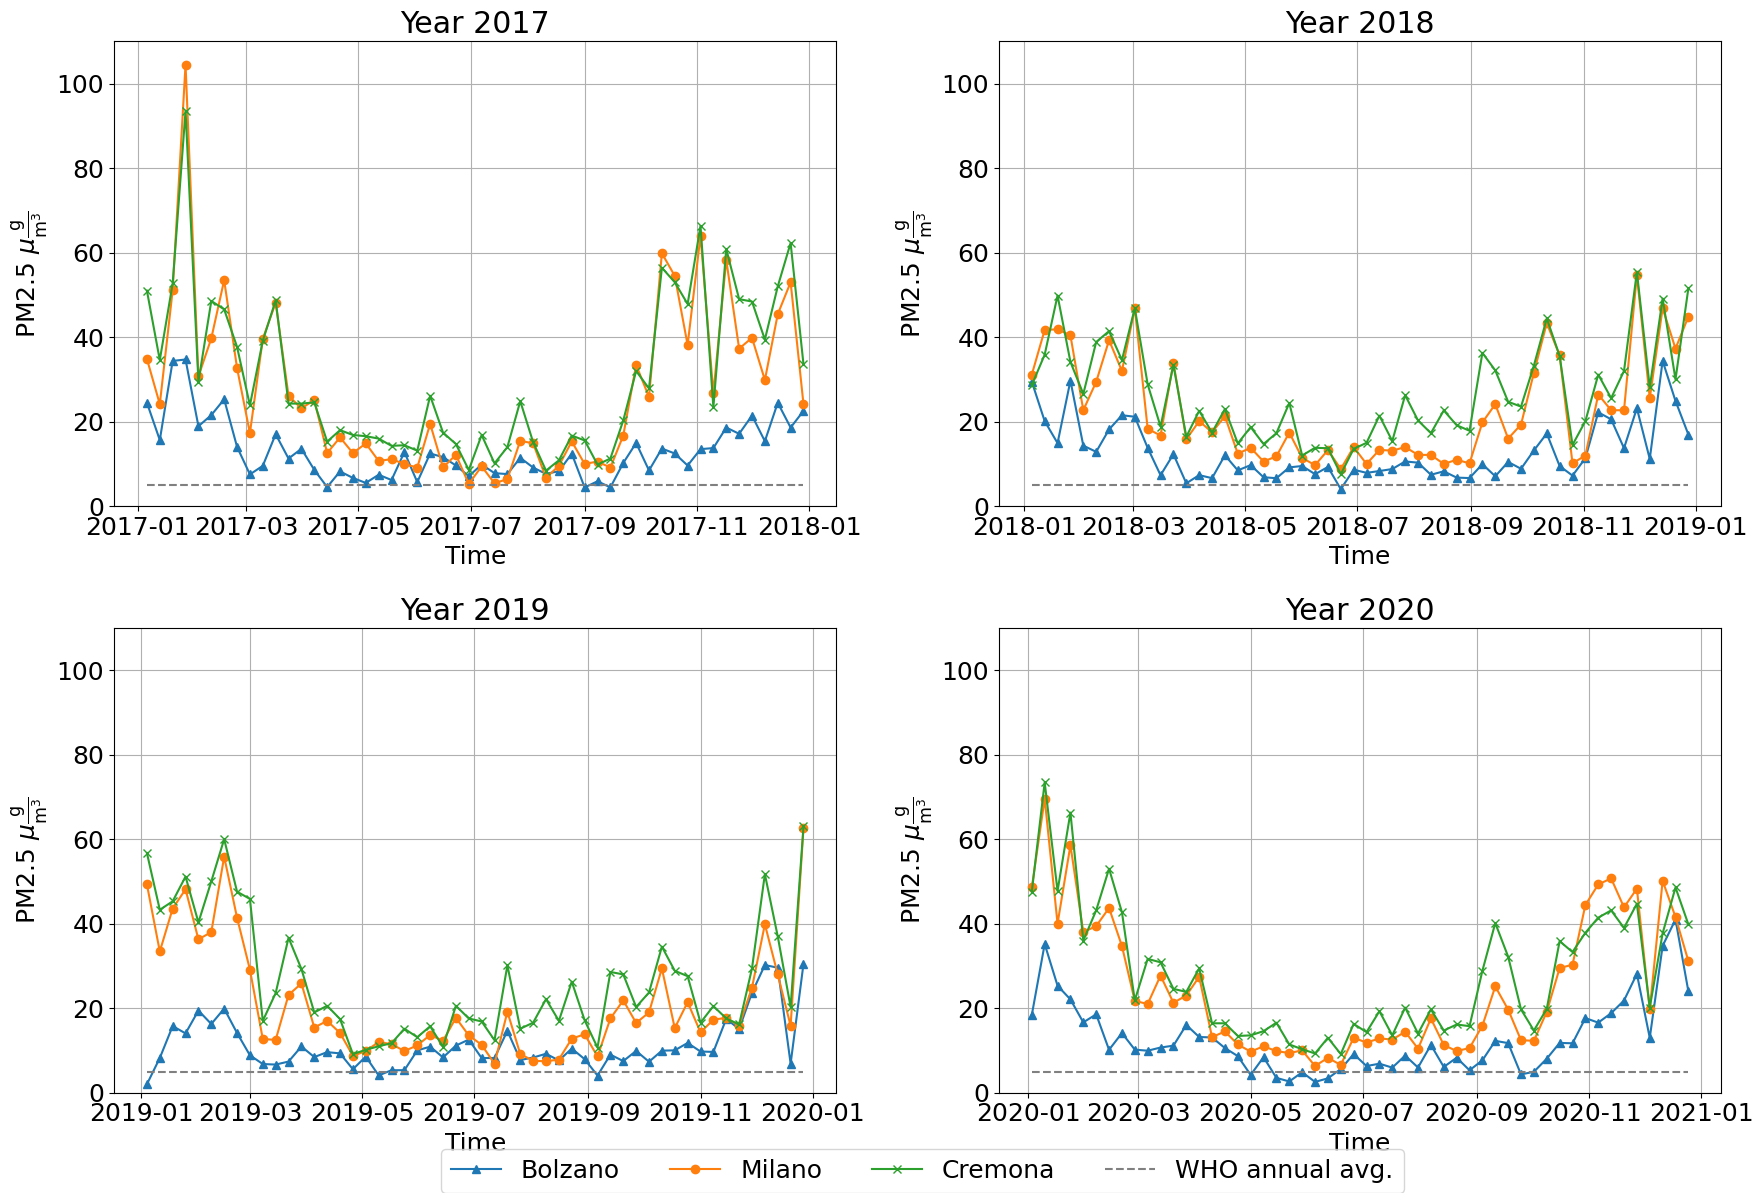

In [9]:
# Bolzano-Milano-Cremona nel 2020

import matplotlib.pyplot as plt

matplotlib.rcParams.update({"font.size": 18})
plt.rcParams["axes.grid"] = True

idx_mapping = {0: [0, 0], 1: [0, 1], 2: [1, 0]}

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
years = list(range(2017, 2021))
idx = 0
for ax in axes.flat:
    year = years[idx]
    df = pd.read_csv("dataset_{}.csv".format(str(year)))

    # Assicurati che la colonna 'PM2.5' sia in formato numerico e 'Data' sia in formato datetime
    df["AQ_pm25"] = pd.to_numeric(df["AQ_pm25"], errors="coerce")
    df["Time"] = pd.to_datetime(df["Time"])

    # Seleziona tre stazioni
    stations_sel = ["STA.IT0499A", "548", "1297"]
    labels = ["Bolzano", "Milano", "Cremona"]
    markers = ["^", "o", "x"]

    # Filtra il dataset per le stazioni selezionate
    df_sel = df[df["IDStations"].isin(stations_sel)]

    # Crea un subplot per il grafico
    # plt.figure(figsize=(10, 6))

    # Itera attraverso le stazioni selezionate e plotta i dati PM2.5 nel corso dell'anno
    for marker_idx, (station, label) in enumerate(zip(stations_sel, labels)):
        df_station = df_sel[df_sel["IDStations"] == station]
        ax.plot(
            df_station["Time"],
            df_station["AQ_pm25"],
            label=label,
            marker=markers[marker_idx],
        )

    # Impostazioni del grafico
    ax.set_title("Year {}".format(year))
    ax.plot(
        df_station["Time"],
        [5] * len(df_station["AQ_pm25"]),
        "--",
        color="gray",
        label="WHO annual avg.",
    )
    ax.set_xlabel("Time")
    ax.set_ylabel(r"PM2.5 $\mu \frac{\mathrm{g}}{\mathrm{m}^3}$")
    ax.set_ylim(0, 110)
    idx += 1
    # axes[idx].legend()
    # axes[idx].grid(True)
handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc="upper right")
fig.legend(handles, labels, loc=(0.25, 0), ncol=4)

# Visualizza il grafico
plt.tight_layout()
plt.savefig("../report/imgs/bolzano_milano_cremona_2017_2020.pdf")
plt.savefig("../report/imgs/bolzano_milano_cremona_2017_2020.jpg")
plt.show()

In [ ]:
# timeseries dei dati di una/due stazioni in diversi anni, vedere se segue dei trend (prendere stazioni in parti diverse)

df = pd.read_csv(data_path)

df['AQ_pm25'] = pd.to_numeric(df['AQ_pm25'], errors='coerce')

groups_stations = df.groupby('IDStations')

stations_wo_nan_pm25 = []

# Itera attraverso i gruppi di stazioni
for station, data_station in groups_stations:
    # Verifica se la stazione ha valori non nulli per PM2.5 in ogni misurazione
    if not data_station['AQ_pm25'].isnull().any():
        stations_wo_nan_pm25.append(station)

# Stampare le stazioni senza valori nulli di PM2.5 per ogni misurazione
print("Stazioni senza valori nulli di PM2.5 per ogni misurazione:")
print(stations_wo_nan_pm25)

# tutti gli anni completi --> 1297 (Cremona), STA-CH0033A (Svizzera)

In [ ]:
# Cremona-Svizzera in tutti gli anni

import matplotlib.pyplot as plt

df = pd.read_csv(data_path)

# Assicurati che la colonna 'PM2.5' sia in formato numerico e 'Data' sia in formato datetime
df['AQ_pm25'] = pd.to_numeric(df['AQ_pm25'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'])

# Seleziona tre stazioni
stations_sel = ['STA-CH0033A', 1297]
labels = ['Svizzera','Cremona']

# Filtra il dataset per le stazioni selezionate
df_sel = df[df['IDStations'].isin(stations_sel)]

# Crea un subplot per il grafico
plt.figure(figsize=(10, 6))

# Itera attraverso le stazioni selezionate e plotta i dati PM2.5 nel corso dell'anno
for station, label in zip(stations_sel, labels):
    df_station = df_sel[df_sel['IDStations'] == station]
    plt.plot(df_station['Time'], df_station['AQ_pm25'], label=label)

# Impostazioni del grafico
plt.title('Variazione PM2.5 nel corso di diversi anni')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.ylim(0,110)
plt.legend()
plt.grid(True)

# Visualizza il grafico
plt.tight_layout()
plt.show()

## Time Series Analysis

In [ ]:
df_timeseries = df_sel[df_sel["IDStations"] == stations_sel[0]][["Time", "AQ_pm25"]]
print(df_timeseries.head())

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing

decomp_type = "multplicative"  # "additive"
period_size = 52
decomp = {}

time = df_sel[df_sel["IDStations"] == station]["Time"].reset_index()

for station, label in zip(stations_sel, labels):
    df_timeseries = df_sel[df_sel["IDStations"] == station]["AQ_pm25"].reset_index()
    decomp[label] = sm.tsa.seasonal_decompose(
        df_timeseries["AQ_pm25"], model=decomp_type, period=period_size,
    )

fig, ax = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

ax[0].plot(decomp["Svizzera"].observed, label="Svizzera")
ax[0].plot(decomp["Cremona"].observed, label="Cremona")
ax[0].set_ylabel("Observed")
ax[0].legend(loc="upper right")

ax[1].plot(decomp["Svizzera"].trend)
ax[1].plot(decomp["Cremona"].trend)
ax[1].set_ylabel("Trend")

ax[2].plot(decomp["Svizzera"].seasonal)
ax[2].plot(decomp["Cremona"].seasonal)
ax[2].set_ylabel("Seasonal")

ax[3].plot(decomp["Svizzera"].resid)
ax[3].plot(decomp["Cremona"].resid)
ax[3].set_ylabel("Residual")

fig.suptitle("{} Time Series Decomposition".format(decomp_type))
plt.xlabel("Weeks")
plt.show()